<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [83]:
# Something new to install...
#! pip install plotly

In [84]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

### I. Get Data Ready

In [85]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [86]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [87]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [88]:
# Nulls
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [89]:
# Filter Data to Most Recent Year
df.sort_values(by='year', ascending=False)[:5]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1703,Zimbabwe,Africa,2007,43.48700,12311143,469.70930,ZWE,716
491,Equatorial Guinea,Africa,2007,51.57900,551201,12154.08975,GNQ,226
515,Ethiopia,Africa,2007,52.94700,76511887,690.80558,ETH,231
527,Finland,Europe,2007,79.31300,5238460,33207.08440,FIN,246
539,France,Europe,2007,80.65700,61083916,30470.01670,FRA,250


In [90]:
# Set Country to Index
df.set_index('country')

,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
country,,,,,,,
Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4
...,...,...,...,...,...,...,...
Zimbabwe,Africa,1987,62.35100,9216418,706.15731,ZWE,716
Zimbabwe,Africa,1992,60.37700,10704340,693.42079,ZWE,716
Zimbabwe,Africa,1997,46.80900,11404948,792.44996,ZWE,716


In [91]:
# Drop `iso_alpha`, `year`, and `iso_num`
df.drop(columns=['iso_alpha','year','iso_num'], index=1, inplace=True)

In [92]:
# How many countries in each continent?
df['continent'].value_counts()

Africa      624
Asia        395
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [93]:
# Get dummies!
continent = pd.get_dummies(df['continent'], drop_first=True)
df = df.join(continent, lsuffix="_left")

In [94]:
# Head (again!)
df.head()

,country,continent,lifeExp,pop,gdpPercap,Americas,Asia,Europe,Oceania
0,Afghanistan,Asia,28.80100,8425333,779.44531,0,1,0,0
2,Afghanistan,Asia,31.99700,10267083,853.10071,0,1,0,0
3,Afghanistan,Asia,34.02000,11537966,836.19714,0,1,0,0
4,Afghanistan,Asia,36.08800,13079460,739.98111,0,1,0,0
5,Afghanistan,Asia,38.43800,14880372,786.11336,0,1,0,0


In [98]:
df.columns

Index(['country', 'continent', 'lifeExp', 'pop', 'gdpPercap', 'Americas',
       'Asia', 'Europe', 'Oceania'],
      dtype='object')

In [103]:
# Define X

X = df[['lifeExp', 'pop', 'gdpPercap', 'Americas',
       'Asia', 'Europe', 'Oceania']]

In [104]:
# Scale Features
sc = StandardScaler()
Xsc = sc.fit_transform(X)

### II. K-Means Clustering Model

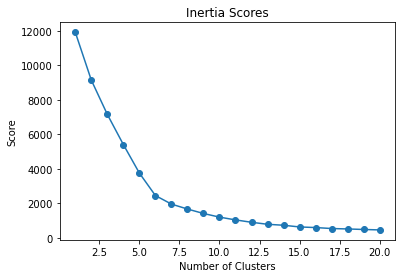

In [110]:
# Elbow Plot

# loop for a inertia_list
inertia_list = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Xsc)
    inertia_list.append(kmeans.inertia_)
# plot it out
plt.plot(range(1,21), inertia_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

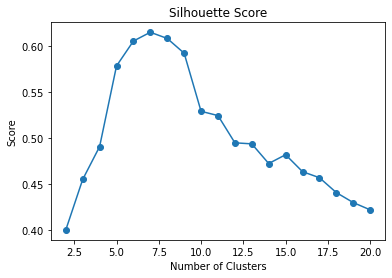

In [111]:
# Silhouette Score

# loop for a inertia_list
silhouette_list = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Xsc)
    silhouette_list.append(silhouette_score(Xsc, kmeans.labels_))

# plot it out
plt.plot(range(2,21), silhouette_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Score');
# Silhouette score is in range -1 to 1

#### Based off of our metrics above, which k should we try first?

Answer Here: 7 !!!



In [120]:
# Now let's try it!

# Instantiate & Fit
km = KMeans(n_clusters=7,random_state=69)
km.fit_transform(Xsc)[:1]

array([[4.97662818, 2.83763347, 2.249677  , 4.66287625, 9.6603177 ,
        4.54250185, 8.64210663]])

In [118]:
# Silhouette Score
silhouette_score(Xsc, km.labels_)

0.6154286335669025

#### Visualize Your Clusters!

In [121]:
# Add cluster column
df['cluster'] = km.labels_

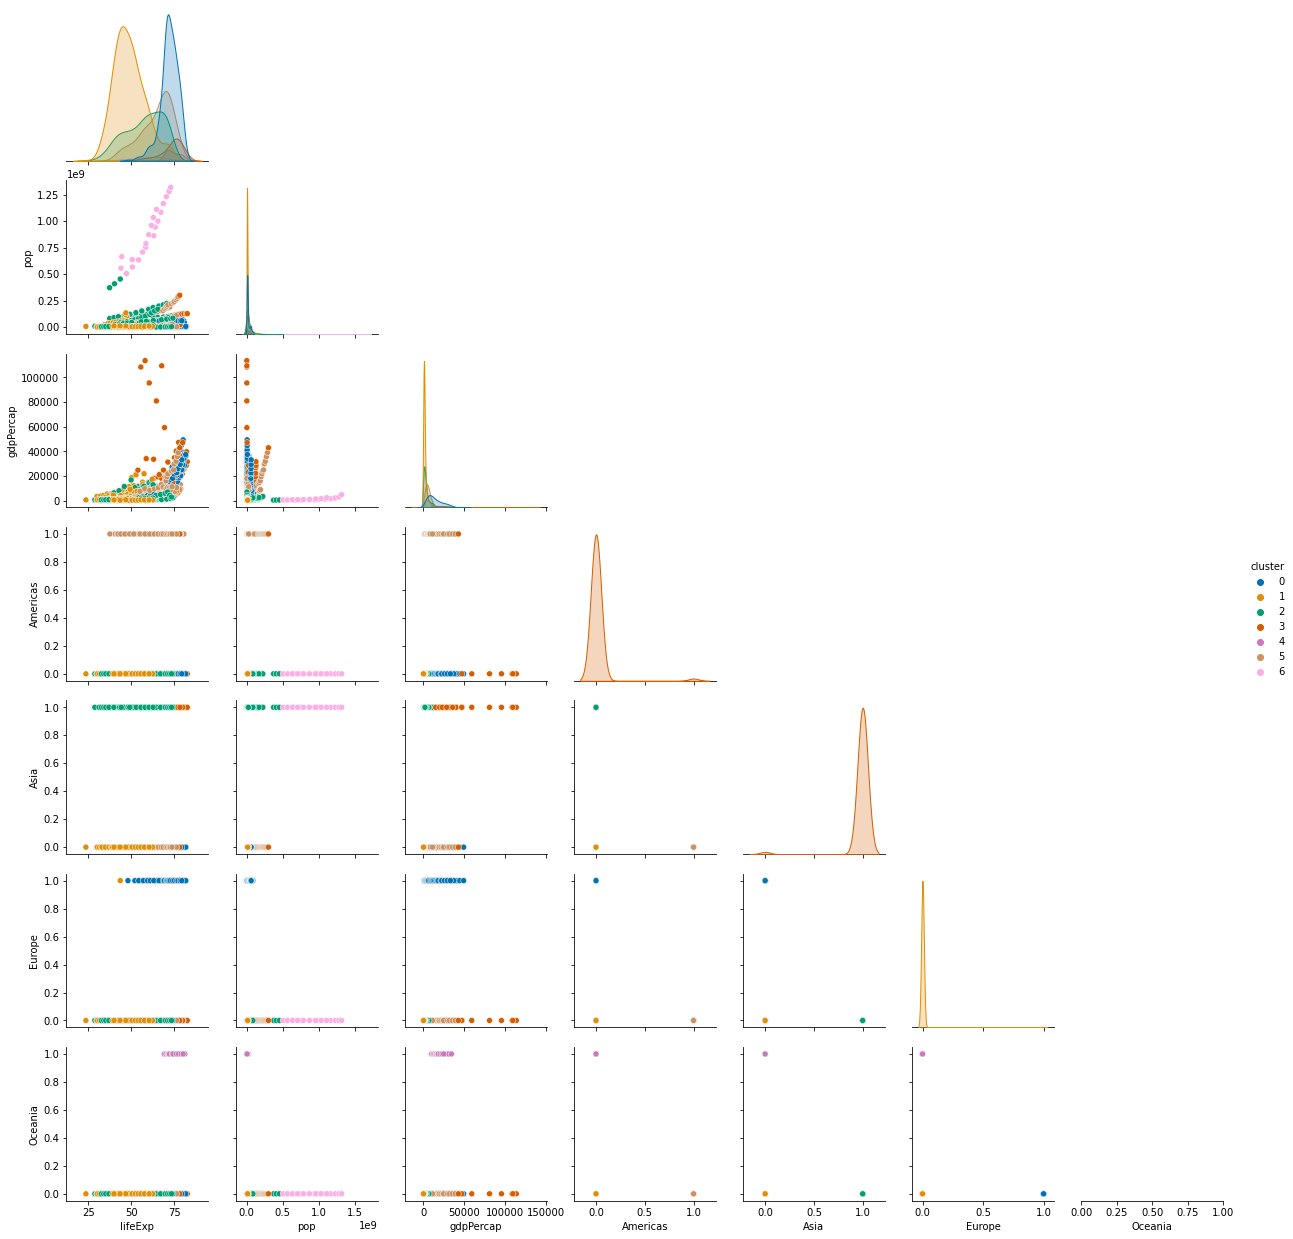

In [131]:
# Method 1: Pairplots/Scatterplots
sns.pairplot(df, hue='cluster', corner=True, palette='colorblind');

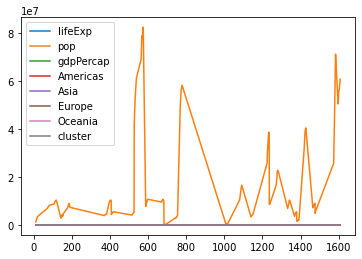

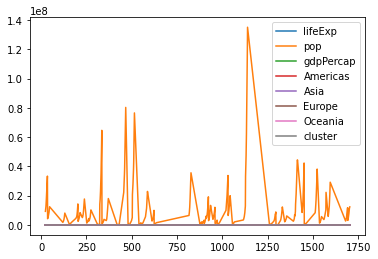

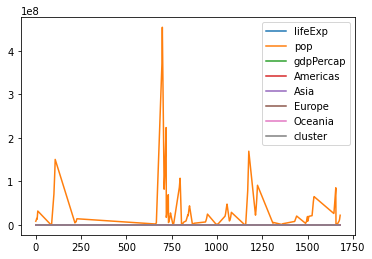

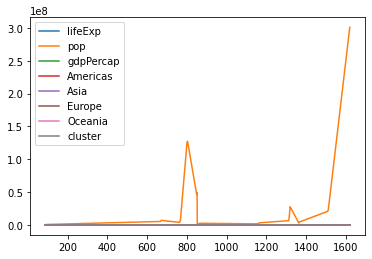

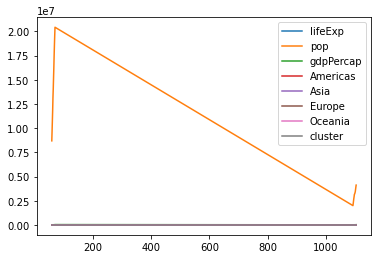

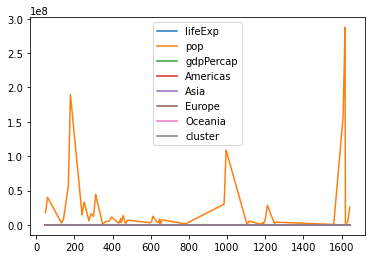

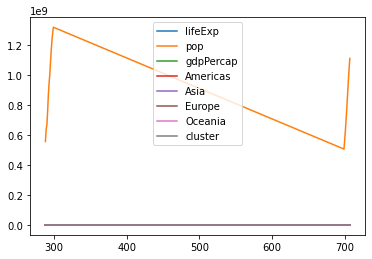

In [140]:
# Method 2: Groupby
df.groupby(by='cluster').plot();

#### An Even Closer Look...Which countries are in each of these clusters?

In [198]:
# For loop
country = dict(zip(df.cluster, df.country))
country

{2: 'Yemen, Rep.',
 0: 'United Kingdom',
 1: 'Zimbabwe',
 5: 'Venezuela',
 4: 'New Zealand',
 3: 'United States',
 6: 'India'}

### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Visualize your clusters
- Determine your best silhouette score
- Is this better or worse than KMeans?
- Which countries are in each cluster?

In [277]:
df = px.data.gapminder()
df.drop(columns=['iso_alpha','year','iso_num'], index=1, inplace=True)

In [278]:
db = DBSCAN(eps=1.5,min_samples=5) # default

In [279]:
db.fit(Xsc)

DBSCAN(eps=1.5)

In [280]:
df['cluster'] = db.labels_
continent = pd.get_dummies(df['continent'], drop_first=True)
df = df.join(continent, lsuffix="_left")

In [281]:
print(silhouette_score(Xsc, km.labels_))
print(silhouette_score(Xsc, db.labels_))
# DBSCAN got worse silhouette score

0.6154286335669025
0.614936047045207


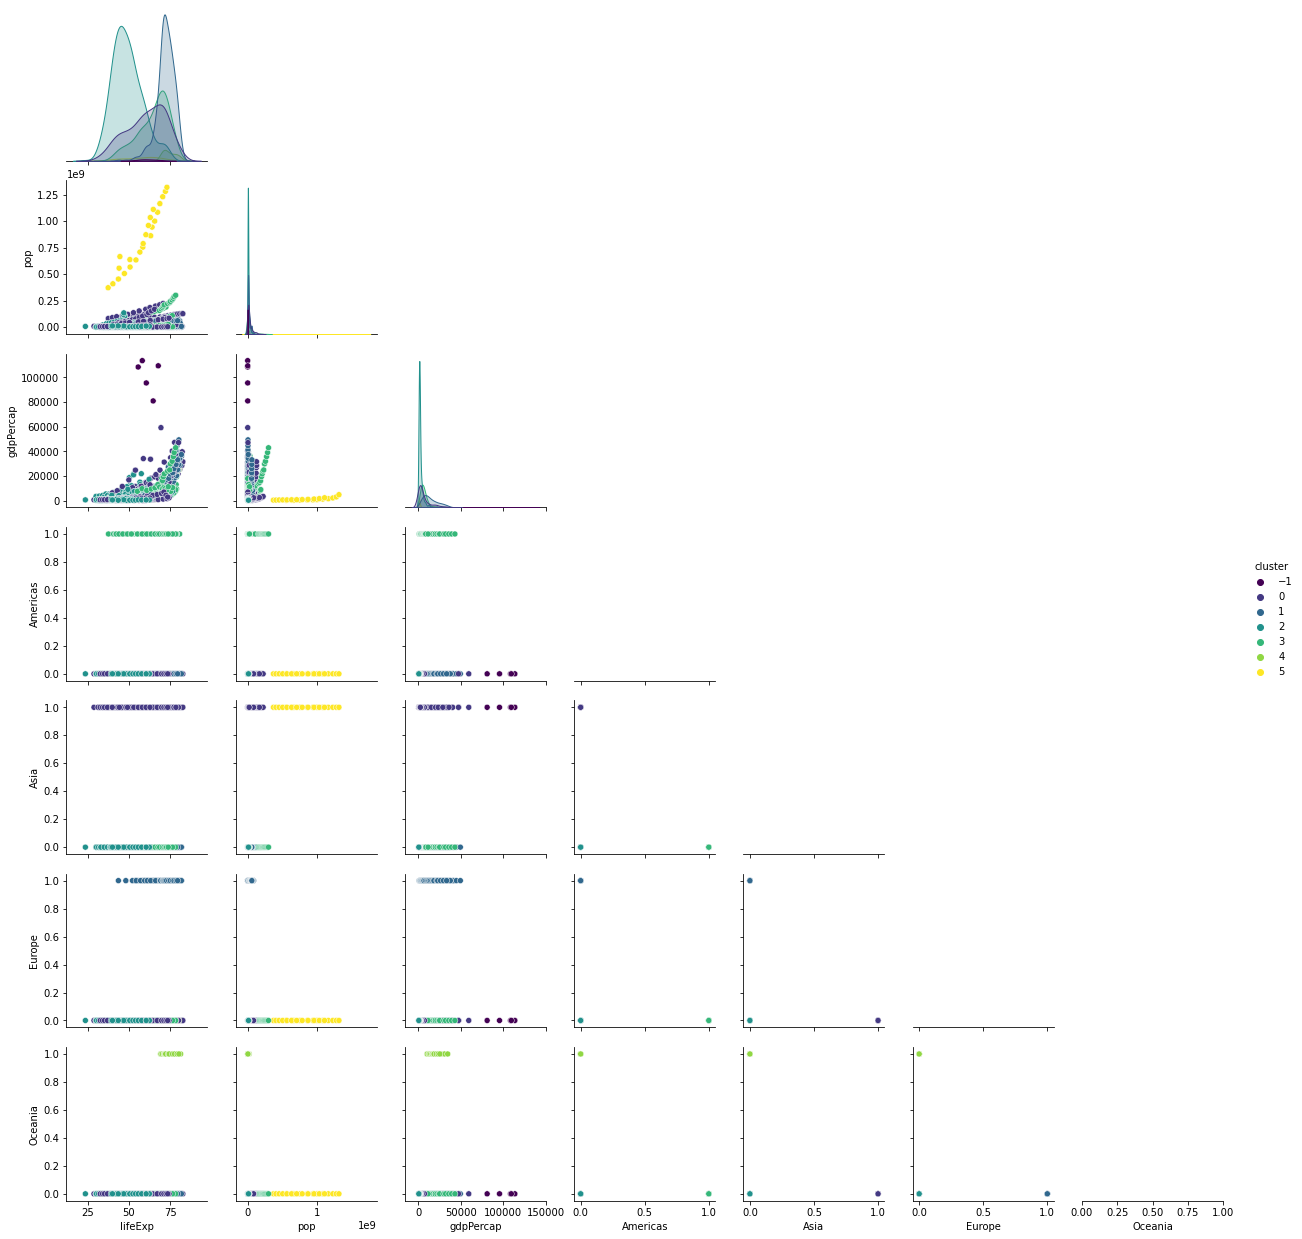

In [282]:
sns.pairplot(df, corner=True, hue='cluster', palette='viridis');

In [283]:
country = dict(zip(df.cluster, df.country))
country

{0: 'Yemen, Rep.',
 1: 'United Kingdom',
 2: 'Zimbabwe',
 3: 'Venezuela',
 4: 'New Zealand',
 5: 'India',
 -1: 'Kuwait'}

### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 